In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
housing_train = pd.read_csv('C:/Users/USER/Downloads/Compressed/house-prices-advanced-regression-techniques/train.csv')
housing_test = pd.read_csv('C:/Users/USER/Downloads/Compressed/house-prices-advanced-regression-techniques/test.csv')
housing_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
housing_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [3]:
housing_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
housing_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing_train.shape

(1460, 81)

In [7]:
housing_train.sample(3).T

,502,510,1139
Id,503,511,1140
MSSubClass,20,20,30
MSZoning,RL,RL,RL
LotFrontage,70,75,98
LotArea,9170,14559,8731
...,...,...,...
MoSold,4,6,5
YrSold,2007,2009,2007
SaleType,WD,WD,WD
SaleCondition,Normal,Normal,Normal


In [8]:
housing_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
housing_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Discover and visualize to gain insights

## Looking for correlations

In [10]:
corr_matrix = housing_train.corr()
top_correlated_features =corr_matrix.index
corr_matrix['SalePrice'].sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:>

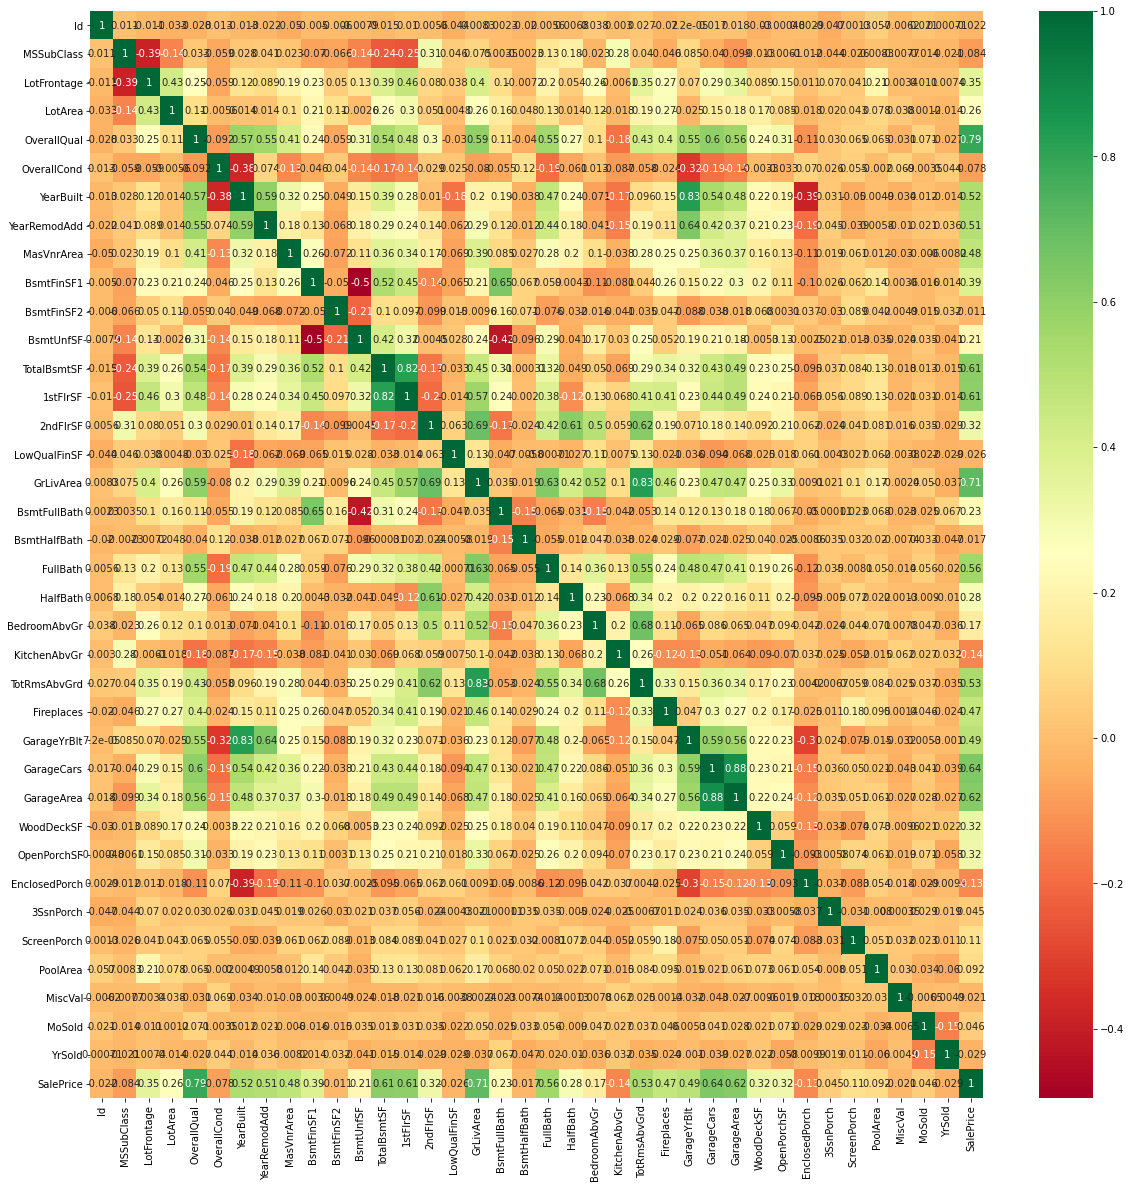

In [11]:
plt.figure(figsize = (20,20))
sns.heatmap(housing_train[top_correlated_features].corr(), annot = True, cmap ='RdYlGn')

#### Working with the OverallQual and the SalePrice

In [12]:
housing_train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

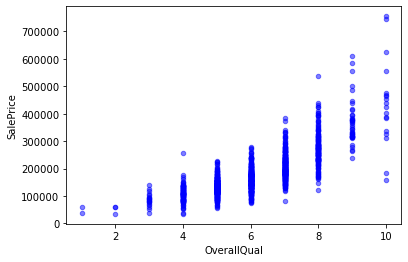

In [13]:
## Shows a strong positive relationship between the Overall quality of the house and the Sale price
housing_train.plot(kind= 'scatter', x = 'OverallQual', y ='SalePrice', color = 'b', alpha=0.5)

<AxesSubplot:xlabel='OverallQual'>

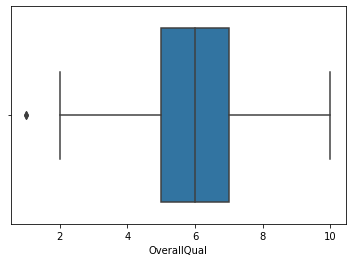

In [14]:
sns.boxplot(x='OverallQual', data=housing_train)

### Working with the LotArea and the SalePrice

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

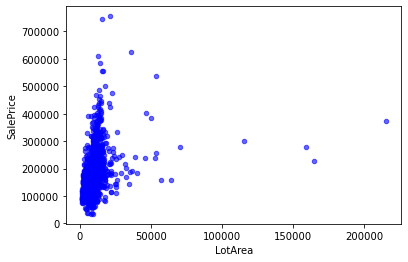

In [15]:
## The relationship is not that strong and shows presence  of alot of noise in the data
housing_train.plot(kind= 'scatter', x = 'LotArea', y ='SalePrice',color ='b', alpha =0.6)

### Working with the GrLivArea

<AxesSubplot:xlabel='GrLivArea'>

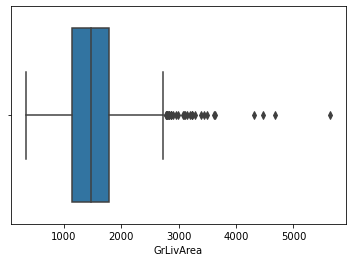

In [16]:
sns.boxplot(housing_train["GrLivArea"])


### Working with Street

In [17]:
housing_train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

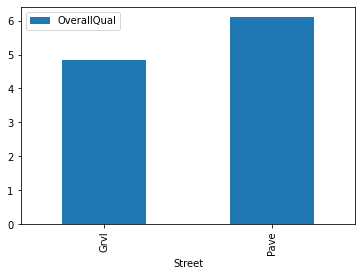

In [18]:
# In terms of overall quality the best street to buy a house in.
Street_pivot =housing_train.pivot_table(index ="Street", values = 'OverallQual')
Street_pivot.plot.bar()
plt.show()

### Working with the neighborhood data

In [19]:
housing_train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

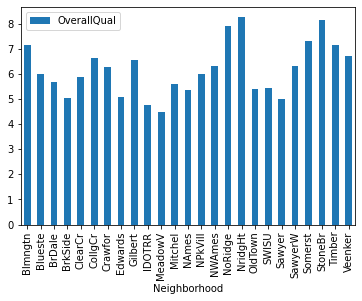

In [20]:
# In terms of overall quality the best neighborhood to buy a house in.
Neighborhood_pivot =housing_train.pivot_table(index ="Neighborhood", values = 'OverallQual')
Neighborhood_pivot.plot.bar()
plt.show()

### Working with salecondition data

In [21]:
housing_train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [22]:
## comparing the SaleCondition data to the OverallQual of the house

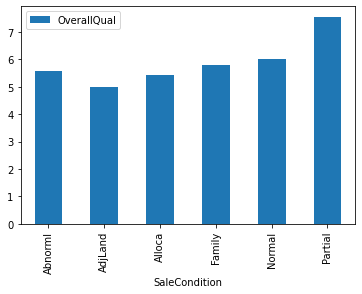

In [23]:
SaleCondition_pivot =housing_train.pivot_table(index ="SaleCondition", values = 'OverallQual')
SaleCondition_pivot.plot.bar()
plt.show()

### Working with Mszoning data

In [24]:
housing_train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

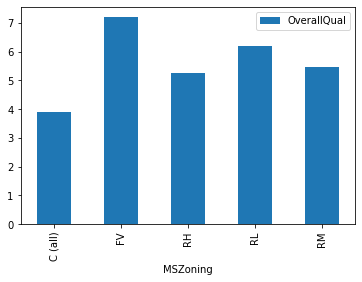

In [25]:
MSZoning_pivot =housing_train.pivot_table(index ='MSZoning', values = 'OverallQual')
MSZoning_pivot.plot.bar()
plt.show()

# Data cleaning

In [26]:
## The label feature what we are trying to predict
housing_label = housing_train['SalePrice']

In [27]:
# The input features for the training set 
housing_train = housing_train.drop('SalePrice', axis =1)

In [28]:
housing_train.shape

(1460, 80)

In [29]:
# Dropping features whose attributes are >1000
features = []
nullValues = []
for i in housing_train:
    if (housing_train.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(housing_train.isna().sum()[i])
print(features)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [30]:
housing_train = housing_train.dropna(axis=1, how='any', thresh = 1000)

In [31]:
housing_train.shape

(1460, 75)

### Dealing with numerical missing values

In [32]:
housing_num = housing_train.select_dtypes(include = ['float', 'int64'])
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median') # filling in the missing values using the median
imputer.fit(housing_num)
imputer.statistics_
housing_num.median().values

array([7.3050e+02, 5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00,
       5.0000e+00, 1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02,
       0.0000e+00, 4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00,
       0.0000e+00, 1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9800e+03, 2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03])

In [34]:
X = imputer.transform(housing_num)
housing_numm =pd.DataFrame(X , columns = housing_num.columns)
housing_numm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

### Dealing with categorical missing values

In [35]:
housing_cat = housing_train.select_dtypes(include = ['object'])
housing_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [36]:
housing_cat = housing_cat.infer_objects()

In [37]:
housing_cat = housing_cat.ffill().bfill()

In [38]:
housing_cat.shape

(1460, 38)

In [39]:
all_columns =list(housing_cat) # Creates a list of all column headers
housing_cat[all_columns] = housing_cat[all_columns].astype('category')

In [40]:
housing_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1460 non-null   category
 1   Street         1460 non-null   category
 2   LotShape       1460 non-null   category
 3   LandContour    1460 non-null   category
 4   Utilities      1460 non-null   category
 5   LotConfig      1460 non-null   category
 6   LandSlope      1460 non-null   category
 7   Neighborhood   1460 non-null   category
 8   Condition1     1460 non-null   category
 9   Condition2     1460 non-null   category
 10  BldgType       1460 non-null   category
 11  HouseStyle     1460 non-null   category
 12  RoofStyle      1460 non-null   category
 13  RoofMatl       1460 non-null   category
 14  Exterior1st    1460 non-null   category
 15  Exterior2nd    1460 non-null   category
 16  MasVnrType     1460 non-null   category
 17  ExterQual      1460 non-null   ca

In [41]:
# Label encoding multiple columns
from sklearn.preprocessing import LabelEncoder
encoded = pd.DataFrame(columns = housing_cat.columns , 
                       data = LabelEncoder().fit_transform(housing_cat.values.flatten()).reshape(housing_cat.shape))

In [42]:
encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,127,120,134,86,12,84,75,41,110,110,...,136,71,154,17,125,149,149,166,158,111
1,127,120,134,86,12,54,75,156,59,110,...,136,149,154,17,125,149,149,166,158,111
2,127,120,80,86,12,84,75,41,110,110,...,136,71,154,17,125,149,149,166,158,111
3,127,120,80,86,12,47,75,48,110,110,...,136,71,154,50,155,149,149,166,158,10
4,127,120,80,86,12,54,75,107,110,110,...,136,71,154,17,125,149,149,166,158,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,127,120,134,86,12,84,75,72,110,110,...,136,149,154,17,125,149,149,166,158,111
1456,127,120,134,86,12,84,75,104,110,110,...,136,149,95,17,155,149,149,166,158,111
1457,127,120,134,86,12,84,75,48,110,110,...,136,71,154,17,125,149,149,166,158,111
1458,127,120,134,86,12,84,75,102,110,110,...,63,71,154,17,155,149,149,166,158,111


In [43]:
housing_prepared = pd.concat([housing_numm , encoded], axis = 1)

In [44]:
housing_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [45]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories ='auto')
housing_cat_1Hot = enc.fit_transform(housing_cat)
housing_cat_1Hot

<1460x234 sparse matrix of type '<class 'numpy.float64'>'
	with 55480 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self , feature_names):
        self._feature_names = feature_names
        
    def fit(self, X, y = None):
        return self
        
    def transform(self, X , y =None):
        return X[self._feature_names]

In [47]:
### Create a pipeline  then change the label encoder into one hot encoders
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

num_attributes = list(housing_num)
categorical_atrributes = list(housing_cat)

num_pipeline = Pipeline( steps = [
    ('selector', FeatureSelector(num_attributes)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('imput', OneHotEncoder(handle_unknown='ignore'))
])


full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', categorical_transformer)
])




In [48]:
housing_pr = full_pipeline.fit_transform(housing_train)

## Select a model and train

In [49]:
## Use the gradient boosting regressor for your datadet

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(n_estimators=15000, max_depth=4, min_samples_leaf=15, min_samples_split=10, learning_rate=0.01, loss='huber', random_state=5)

gbrt.fit(housing_pr , housing_label)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          min_samples_leaf=15, min_samples_split=10,
                          n_estimators=15000, random_state=5)

In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = gbrt.predict(housing_pr )
gbrt_mse = mean_squared_error(housing_label, housing_predictions)
gbrt_rmse = np.sqrt(gbrt_mse)
gbrt_rmse

10881.600904973484

<AxesSubplot:>

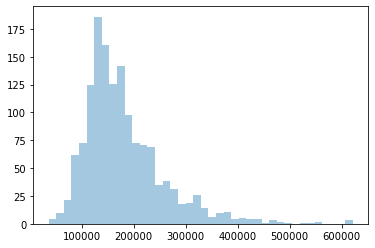

In [52]:
sns.distplot(gbrt.predict(housing_pr),kde=None)

In [53]:
some_data = housing_train.iloc[:5]
some_labels = housing_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
predictions =gbrt.predict(some_data_prepared)
print("Predictions:\t" ,predictions )

Predictions:	 [207285.1737694  180712.62463749 222139.85344347 142072.05013378
 255736.14750758]


In [54]:
diff_in_labels = some_labels - predictions
print("The difference between prediction and the actual prices:\t", diff_in_labels )

The difference between prediction and the actual prices:	 0    1214.826231
1     787.375363
2    1360.146557
3   -2072.050134
4   -5736.147508
Name: SalePrice, dtype: float64


In [55]:
gbrt.score(housing_pr , housing_label)

0.9812251137559637

In [56]:
features = []
nullValues = []
for i in housing_test:
    if (housing_test.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(housing_test.isna().sum()[i])
print(features)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [57]:
housing_test = housing_test.dropna(axis=1, how='any', thresh = 1000)


In [58]:
housing_test_prepared =  full_pipeline.transform(housing_test)

In [60]:
target_predictions = gbrt.predict(housing_test_prepared)

target_predictions = np.reshape(target_predictions, -1)


In [64]:
solution = pd.DataFrame({"id":housing_test.Id, "SalePrice":target_predictions})

solution.to_csv('submission.csv', index=False)